## 0. Libraries 📚

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import ast
from collections import Counter

In [2]:
# Configuración para que los gráficos se vean bien
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

## 1. Load data 📥

In [3]:
diagnoses_df = pd.read_csv("data/ground_truth_df.csv")
diagnoses_df['Codigos_diagnosticos'] = diagnoses_df['Codigos_diagnosticos'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
diagnoses_df['Diagnosticos_estandar'] = diagnoses_df['Diagnosticos_estandar'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
diagnoses_df

,Descripcion_diagnosticos,Descripcion_diagnosticos_limpio,Codigos_diagnosticos,Diagnosticos_estandar
0,F30.2 - MANÍA CON SÍNTOMAS PSICÓTICOS.,f30.2 mania con sintomas psicoticos.,[F30.9],"[Episodio maníaco, no especificado]"
1,\r\nDescompensación rasgos patológicos de pers...,descompensacion rasgos patologicos de personal...,"[F60.3, F79.0]",[Trastorno de inestabilidad emocional de la pe...
2,Intento de suicidio,intento de suicidio,"[F31.3, F32.9, T14.91]","[Trastorno bipolar, episodio actual depresivo,..."
3,ID: trastorno adaptativo,id trastorno adaptativo,[F43.2],[Trastorno de adaptación]
4,JC: Episodio depresivo con intento autolitico ...,jc episodio depresivo con intento autolitico f...,"[F32.9, T14.91]","[Episodio depresivo sin especificación, Suicid..."
...,...,...,...,...
79043,"-Negativa a la ingesta, agitación y alteracion...",negativa a la ingesta agitacion y alteraciones...,"[F4.0, F41.1, F60.4, COGNITIV, F13.0]","[Trastorno de ansiedad, disociativo, relaciona..."
79044,"Eje I: \r\n-Psicosis no especificada, leve des...",eje i psicosis no especificada leve descompens...,"[F32.9, F33.9, F60.3, Z63, F12.0, F14.0, F17.0...","[Episodio depresivo sin especificación, Trasto..."
79045,T ansiedad con insomnio plurifactorial.,t ansiedad con insomnio plurifactorial.,"[F4.0, F51.0]","[Trastorno de ansiedad, disociativo, relaciona..."
79046,"- T. de ansiedad con insomnio comórbido, en re...",t. de ansiedad con insomnio comorbido en remis...,"[F4.0, F51.0]","[Trastorno de ansiedad, disociativo, relaciona..."


## 2. Basic Overview 🔍

In [4]:
# Shape and structure
print("* Shape:", diagnoses_df.shape)
print("* Columns:", diagnoses_df.columns.to_list())

* Shape: (79048, 4)
* Columns: ['Descripcion_diagnosticos', 'Descripcion_diagnosticos_limpio', 'Codigos_diagnosticos', 'Diagnosticos_estandar']


In [5]:
print("* Data types:")
print(diagnoses_df.dtypes)

* Data types:
Descripcion_diagnosticos           object
Descripcion_diagnosticos_limpio    object
Codigos_diagnosticos               object
Diagnosticos_estandar              object
dtype: object


In [6]:
# Missing values
print("* Missing values:")
print(diagnoses_df.isnull().sum())

* Missing values:
Descripcion_diagnosticos           0
Descripcion_diagnosticos_limpio    0
Codigos_diagnosticos               0
Diagnosticos_estandar              0
dtype: int64


In [7]:
# Summary stats
display(diagnoses_df.describe(include='all'))

,Descripcion_diagnosticos,Descripcion_diagnosticos_limpio,Codigos_diagnosticos,Diagnosticos_estandar
count,79048,79048,79048,79048
unique,62582,50111,6354,6354
top,Distimia,distimia,[F43.2],[Trastorno de adaptación]
freq,165,384,7703,7703


In [8]:
# Count of diagnoses
cods_list = diagnoses_df['Codigos_diagnosticos'].tolist()
cods_list = list(set(code for sublist in cods_list for code in sublist))

print("* Num diagnoses:", len(cods_list))

* Num diagnoses: 83


## 3. Univariate Analysis

The 10 most frequent diagnoses represent 48.71% of all diagnoses.


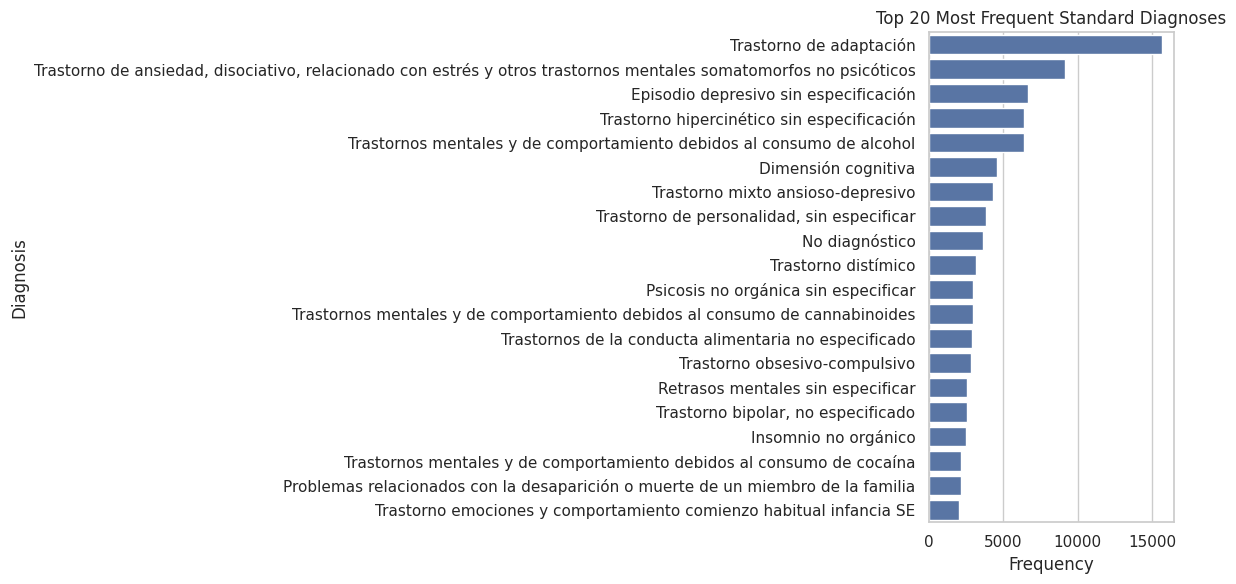

In [9]:
# Most common standard diagnoses
all_diagnoses = [d for sublist in diagnoses_df['Diagnosticos_estandar'] for d in sublist]
diagnosis_counts = Counter(all_diagnoses)
top_diagnoses = diagnosis_counts.most_common(20)

# Calculate the percentage of diagnoses accounted for by the top 10 most frequent
top_10_count = sum(count for _, count in diagnosis_counts.most_common(10))
total_count = sum(diagnosis_counts.values())
percentage_top_10 = (top_10_count / total_count) * 100
print(f"The 10 most frequent diagnoses represent {percentage_top_10:.2f}% of all diagnoses.")

labels, counts = zip(*top_diagnoses)
sns.barplot(x=list(counts), y=list(labels))
plt.title("Top 20 Most Frequent Standard Diagnoses")
plt.xlabel("Frequency")
plt.ylabel("Diagnosis")
plt.tight_layout()
plt.show()

/tmp/ipykernel_26008/421519763.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(codes, rotation=90)


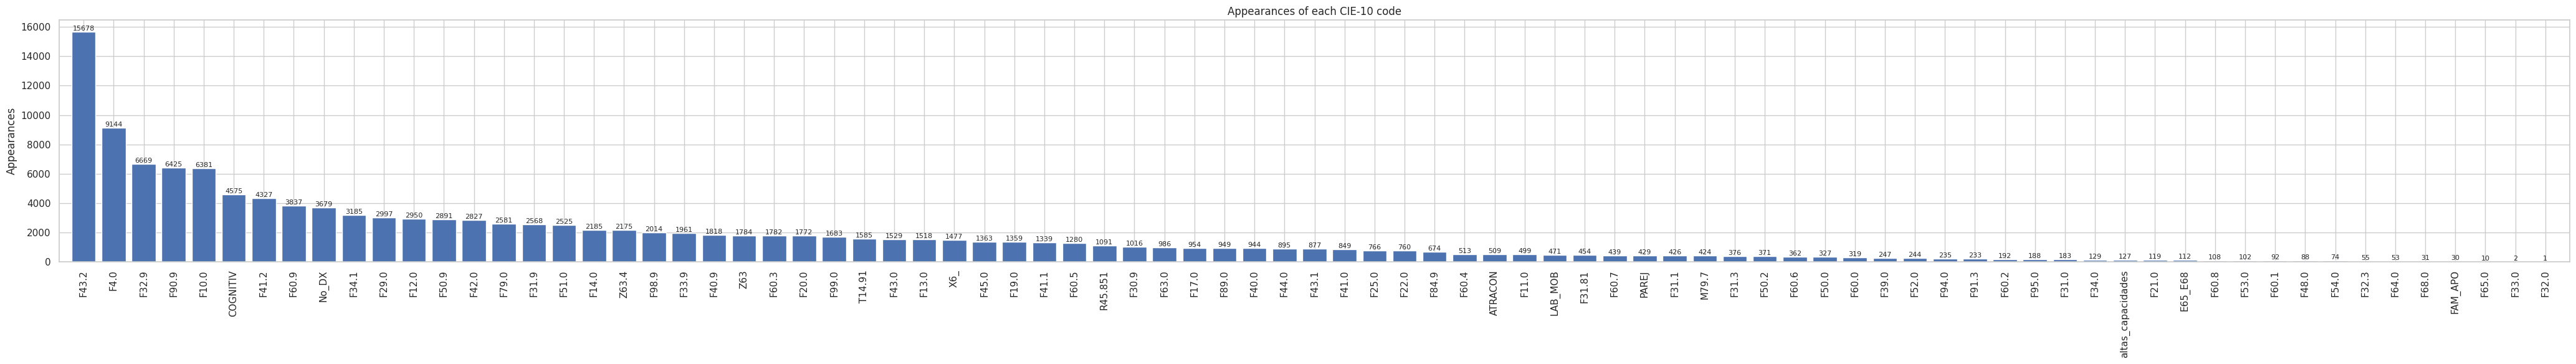

In [10]:
from collections import Counter
import matplotlib.pyplot as plt

# Flatten the nested lists of CIE-10 codes
all_codes = [code for sublist in diagnoses_df['Codigos_diagnosticos'] for code in sublist]

# Count frequencies
code_counts = Counter(all_codes)
codes, freqs = zip(*code_counts.most_common())

fig, ax = plt.subplots(figsize=(max(10, len(codes)*0.5), 6))

bars = ax.bar(codes, freqs, width=0.8)
ax.margins(x=0.005)

# Etiquetas encima de cada barra
for bar, freq in zip(bars, freqs):
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.5,
            str(freq),
            ha='center', va='bottom', fontsize=8)

ax.set_ylabel("Appearances")
ax.set_title("Appearances of each CIE-10 code")
ax.set_xticklabels(codes, rotation=90)

plt.tight_layout()
plt.show()

In [11]:
from collections import Counter

# Flatten the lists of codes
all_codes = [code for sublist in diagnoses_df['Codigos_diagnosticos'] for code in sublist]

# Frecuencias por código
code_counts = Counter(all_codes)

# Número total de códigos distintos
total_codes = len(code_counts)

# Códigos con < 50 apariciones
rare_codes = sum(1 for freq in code_counts.values() if freq < 250)

# Porcentaje
percent_rare = rare_codes / total_codes * 100

print(f"{percent_rare:.2f}% of the codes appear in less than 250 examples ({rare_codes} of {total_codes}).")


27.71% of the codes appear in less than 250 examples (23 of 83).


In [12]:
import pandas as pd
import numpy as np

diagnosis_series = pd.Series(all_diagnoses)
diagnosis_counts = diagnosis_series.value_counts().rename_axis('Diagnosis').reset_index(name='Count')

# Basic numeric statistics over the frequency counts
freq = diagnosis_counts['Count']
stats = {
    'Total records': freq.sum(),
    'Unique diagnoses': len(freq),
    'Mean frequency': freq.mean(),
    'Median frequency': freq.median(),
    'Mode frequency': freq.mode().iloc[0],  # numeric mode
    'Variance (population)': freq.var(ddof=0),
    'Standard deviation (population)': freq.std(ddof=0),
    'Minimum frequency': freq.min(),
    'Maximum frequency': freq.max()
}

# Build a DataFrame for clarity
stats_df = pd.DataFrame(stats, index=['Value']).T.rename(columns={'Value': 'Statistic'})
stats_df["Statistic"] = stats_df["Statistic"].round().astype(int)

# Identify all diagnoses with the highest frequency (mode diagnoses)
max_freq = freq.max()
most_common_diags = diagnosis_counts[diagnosis_counts['Count'] == max_freq]['Diagnosis'].tolist()

# Display results
print("Most Common Diagnosis:", most_common_diags[0])
display(stats_df)
print()

Most Common Diagnosis: Trastorno de adaptación


,Statistic
Total records,131198
Unique diagnoses,83
Mean frequency,1581
Median frequency,877
Mode frequency,1
Variance (population),5331879
Standard deviation (population),2309
Minimum frequency,1
Maximum frequency,15678


## 4. Word Cloud from Descriptions ☁️

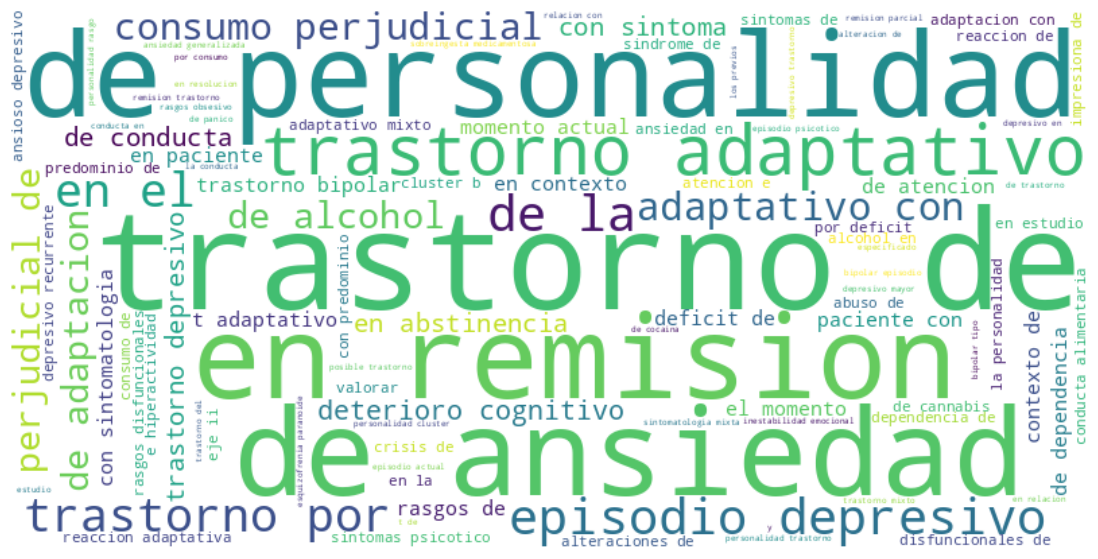

In [13]:
text = ' '.join(diagnoses_df['Descripcion_diagnosticos_limpio'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 5. Relationships and Distributions 🔗

Min: 1
Max: 10
Average: 1.66
Standard deviation: 0.87
The median number of diagnoses per note is: 1.0


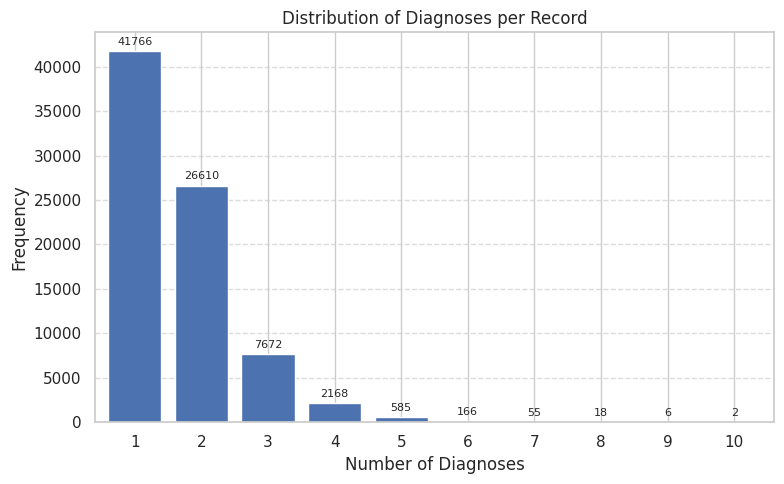

In [14]:
import matplotlib.pyplot as plt

# Discrete count of diagnoses per record
diagnosis_counts = (
    diagnoses_df['Diagnosticos_estandar']
    .apply(len)
    .value_counts()
    .sort_index()
)

# Graphic
fig, ax = plt.subplots(figsize=(8, 5))

bars = ax.bar(diagnosis_counts.index, diagnosis_counts.values, width=0.8)

# Etiquetas encima de cada barra
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom', fontsize=8)

# Stetic details
ax.set_xlabel("Number of Diagnoses")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Diagnoses per Record")

ax.set_xticks(diagnosis_counts.index)    # solo ticks necesarios
ax.margins(x=0.02)                       # margen lateral mínimo
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Print statistics
diagnoses_df['num_diagnoses'] = diagnoses_df['Diagnosticos_estandar'].apply(len)
print(f"Min: {diagnoses_df['num_diagnoses'].min()}")
print(f"Max: {diagnoses_df['num_diagnoses'].max()}")
print(f"Average: {diagnoses_df['num_diagnoses'].mean():.2f}")
print(f"Standard deviation: {diagnoses_df['num_diagnoses'].std():.2f}")


median_diags = diagnoses_df['Diagnosticos_estandar'].apply(len).median()
print(f"The median number of diagnoses per note is: {median_diags}")

plt.tight_layout()
plt.show()

Min: 1
Max: 502
Average: 6.17
Standard deviation: 6.86
The trend of the length of descriptions is: 4 words


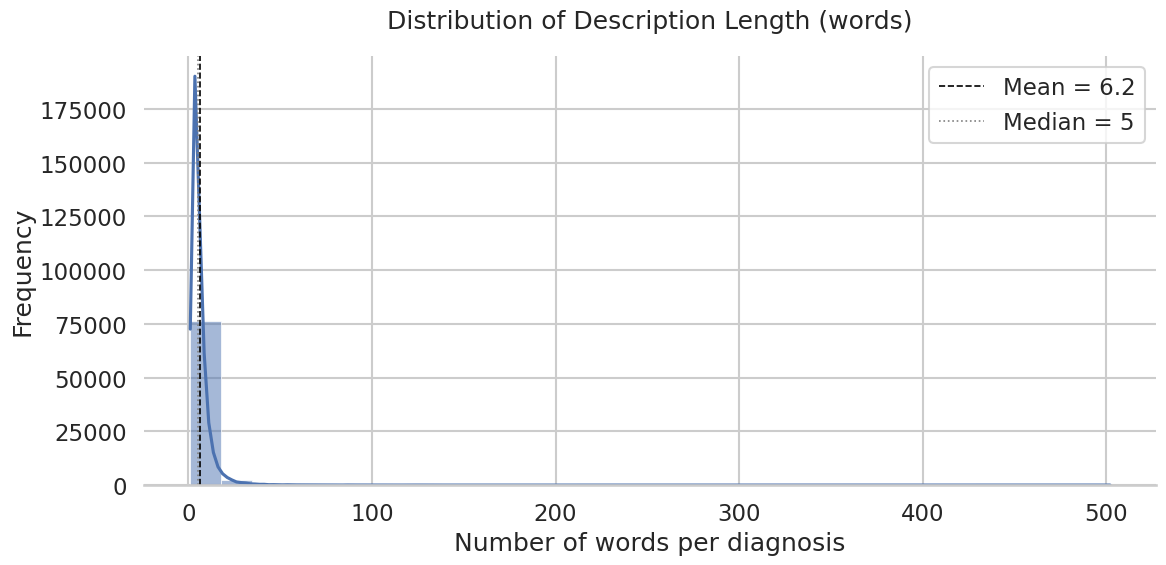

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Compute description length ---
diagnoses_df["desc_length"] = (
    diagnoses_df["Descripcion_diagnosticos_limpio"]
    .astype(str)
    .str.split()
    .str.len()
)

# --- 2. Global style ---
sns.set_theme(context="talk", style="whitegrid")       # large fonts + subtle grid
primary_color = sns.color_palette("deep")[0]

# --- 3. Create the figure ---
fig, ax = plt.subplots(figsize=(12, 6))

# --- 4. Histogram ---
sns.histplot(
    data=diagnoses_df,
    x="desc_length",
    bins=30,
    kde=True,                   # adds a smoothed density curve
    color=primary_color,
    edgecolor="white",
    linewidth=0.5,
    ax=ax,
)

# --- 5. Reference lines (mean & median) ---
mean_len   = diagnoses_df["desc_length"].mean()
median_len = diagnoses_df["desc_length"].median()
ax.axvline(mean_len,   color="black", linestyle="--", linewidth=1.2,
           label=f"Mean = {mean_len:.1f}")
ax.axvline(median_len, color="grey",  linestyle=":",  linewidth=1.2,
           label=f"Median = {median_len:.0f}")

# --- 6. Labels & title ---
ax.set_title("Distribution of Description Length (words)", pad=20)
ax.set_xlabel("Number of words per diagnosis")
ax.set_ylabel("Frequency")
ax.legend()


# Print statistics
diagnoses_df['desc_length'] = diagnoses_df['Descripcion_diagnosticos_limpio'].apply(lambda x: len(str(x).split()))
print(f"Min: {diagnoses_df['desc_length'].min()}")
print(f"Max: {diagnoses_df['desc_length'].max()}")
print(f"Average: {diagnoses_df['desc_length'].mean():.2f}")
print(f"Standard deviation: {diagnoses_df['desc_length'].std():.2f}")
moda_longitudes = diagnoses_df['desc_length'].mode()[0]
print(f"The trend of the length of descriptions is: {moda_longitudes} words")

# --- 7. Final tweaks ---
sns.despine(left=True)          # remove left spine for a cleaner look
plt.tight_layout()
plt.show()